<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Glass-Quality-Prediction/blob/main/GlassQualityPredictionMutation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALLING PACKAGES

In [ ]:
!pip install --upgrade keras
!pip install -q tensorflow==2.0beta1
!pip install catboost
!pip install lightgbm

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)
     |████████████████████████████████| 87.9MB 45kB/s 
     |████████████████████████████████| 501kB 48.4MB/s 
     |████████████████████████████████| 3.1MB 48.1MB/s 
     |████████████████████████████████| 64.8MB 63kB/s 


#IMPORTING

###LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
from matplotlib import cm as cm
import matplotlib.pyplot as plt
from matplotlib import pyplot

import time
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

###MOUNTING DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


###IMPORT TRAINING DATA

In [ ]:
path = "/content/drive/My Drive/Glass Quality Prediction/Train.csv"
train = pd.read_csv(path)
print(train.shape)
train.head()

(1358, 16)


,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.09927,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.20562,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.12060,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.77862,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.40194,0,0,0,0,0,2


In [ ]:
train.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,1.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445290,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335953,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367815,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


###IMPORT TESTING DATA

In [ ]:
path = "/content/drive/My Drive/Glass Quality Prediction/Test.csv"
test = pd.read_csv(path)
print(test.shape)
test.head()

(583, 15)


,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.39175,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.92861,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.21221,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.31058,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.49918,0,0,0,0,0


#DATA VISUALIZATION

###TRAINING DATA 

NULL VALUES CHECK UP 

In [ ]:
train.isnull().values.any()

False

In [ ]:
train.isnull().sum().sum()

0

In [ ]:
#train.fillna(0, inplace = True)
#train.isnull().values.any()
#train.isnull().sum().sum()

CLASS LABEL ANALYSIS

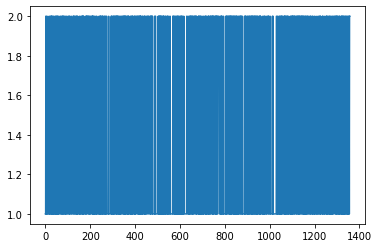

In [ ]:
train['class'].plot()

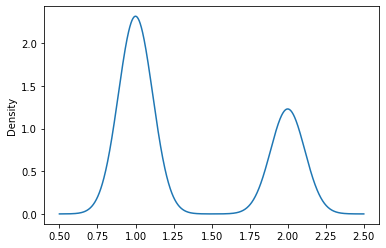

In [ ]:
train['class'].plot.density()

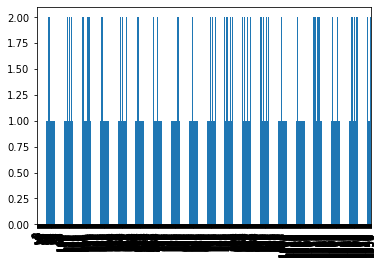

In [ ]:
train['class'].plot.bar()

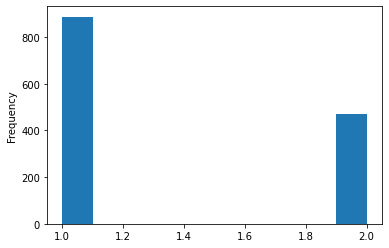

In [ ]:
train['class'].plot.hist()

CLASS LABEL VALUE COUNT ANALYSIS

In [ ]:
train['class'].value_counts()

1    887
2    471
Name: class, dtype: int64

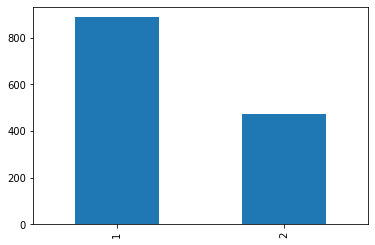

In [ ]:
train['class'].value_counts().plot.bar()

TRAINING CORRELATION MATRIX

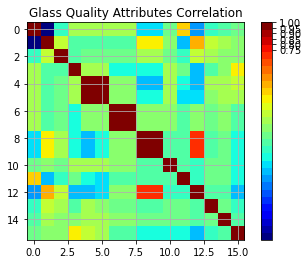

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(train.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Glass Quality Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

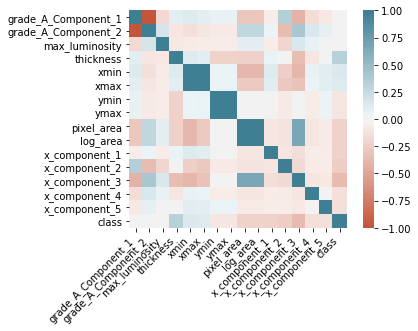

In [ ]:
corr = train.corr()
ax = sns.heatmap(corr, vmin =- 1, vmax = 1, center = 0, 
                  cmap = sns.diverging_palette(20, 220, n=200),
                  square = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

###TESTING DATA 

NULL VALUES CHECK UP 

In [ ]:
test.isnull().values.any()

False

In [ ]:
test.isnull().sum().sum()

0

In [ ]:
#test.fillna(0, inplace = True)
#test.isnull().values.any()
#test.isnull().sum().sum()

TESTING CORRELATION MATRIX

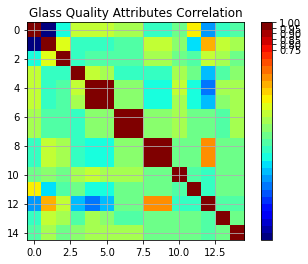

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(test.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Glass Quality Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

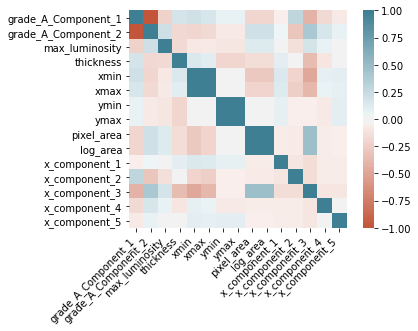

In [ ]:
corr = test.corr()
ax = sns.heatmap(corr, vmin =- 1, vmax = 1, center = 0, 
                  cmap = sns.diverging_palette(20, 220, n=200),
                  square = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

#DATA SPLITTING

TRAINING AND VALIDATION DATA

In [ ]:
Y = train['class'].values
X = train.drop('class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20)

In [ ]:
print("X_train.shape: ",X_train.shape, "X_test.shape: ",X_test.shape,"Y_train.shape: ", Y_train.shape, "Y_test.shape: ",Y_test.shape)

X_train.shape:  (1086, 15) X_test.shape:  (272, 15) Y_train.shape:  (1086,) Y_test.shape:  (272,)


TESTING DATA

In [ ]:
XTest = test
XTest.shape

(583, 15)

#MODELLING

In [ ]:
EVALUATION = {}

###ENSEMBLE MODELLING USING CROSS VALIDATION

In [ ]:
models_list = []
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('SVM', SVC(C=1.7, kernel='rbf'))) 
models_list.append(('NB', GaussianNB()))
models_list.append(('DT', DecisionTreeClassifier(criterion='entropy')))
models_list.append(('BAG', BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)))
models_list.append(('ET', ExtraTreesClassifier(n_estimators=10, max_depth= None, min_samples_split=2)))
models_list.append(('RF', RandomForestClassifier(criterion='entropy')))
models_list.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)))
models_list.append(('GB', XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)))
models_list.append(('ADB', AdaBoostClassifier()))

In [ ]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

KNN: 0.569971 (0.062213) (run time: 0.073188)
SVM: 0.656566 (0.050807) (run time: 0.413186)
NB: 0.519334 (0.036962) (run time: 0.013205)
DT: 0.840741 (0.019902) (run time: 0.113559)
BAG: 0.780878 (0.041058) (run time: 0.261532)
ET: 0.836069 (0.038014) (run time: 0.152795)
RF: 0.851741 (0.023563) (run time: 2.939437)
GB: 0.833325 (0.041117) (run time: 1.127123)
GB: 0.846160 (0.029811) (run time: 0.860486)
ADB: 0.834293 (0.044211) (run time: 1.120406)


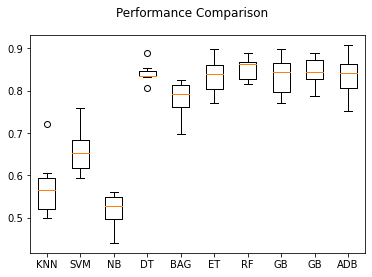

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

PIPELINING

In [ ]:
# Standardize the dataset
pipelines = []

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(C=1.7, kernel='rbf'))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeClassifier(criterion='entropy'))])))
pipelines.append(('ScaledBAG', Pipeline([('Scaler', StandardScaler()),('BAG', BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5))])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(criterion='entropy'))])))
pipelines.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1))])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('GB', XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75))])))
pipelines.append(('ScaledADB', Pipeline([('Scaler', StandardScaler()),('ADB', AdaBoostClassifier())])))

results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledKNN: 0.816709 (0.031190) (run time: 0.076856)
ScaledSVC: 0.843417 (0.020521) (run time: 0.273048)
ScaledNB: 0.790868 (0.034386) (run time: 0.021367)
ScaledDT: 0.836103 (0.018727) (run time: 0.138427)
ScaledBAG: 0.792847 (0.041766) (run time: 0.265263)
ScaledET: 0.850799 (0.026818) (run time: 0.170883)
ScaledRF: 0.845311 (0.021720) (run time: 2.947330)
ScaledGB: 0.832407 (0.040349) (run time: 1.146342)
ScaledXGB: 0.847078 (0.030979) (run time: 0.860056)
ScaledADB: 0.834293 (0.044211) (run time: 1.135983)


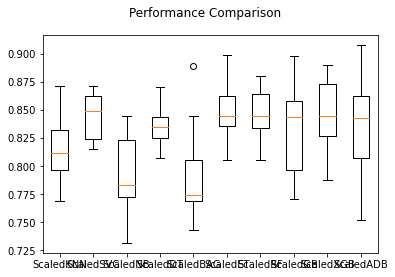

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# define dataset
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.705 (0.044)


In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

0.7022058823529411


>2 : Features :: Accuracy : 0.627 (Time : 0.059)
>3 : Features :: Accuracy : 0.683 (Time : 0.049)
>4 : Features :: Accuracy : 0.689 (Time : 0.052)
>5 : Features :: Accuracy : 0.703 (Time : 0.049)
>6 : Features :: Accuracy : 0.720 (Time : 0.040)
>7 : Features :: Accuracy : 0.765 (Time : 0.053)
>8 : Features :: Accuracy : 0.792 (Time : 0.035)
>9 : Features :: Accuracy : 0.793 (Time : 0.033)
>10 : Features :: Accuracy : 0.795 (Time : 0.034)
>11 : Features :: Accuracy : 0.801 (Time : 0.042)
>12 : Features :: Accuracy : 0.802 (Time : 0.032)
>13 : Features :: Accuracy : 0.818 (Time : 0.035)
>14 : Features :: Accuracy : 0.826 (Time : 0.029)


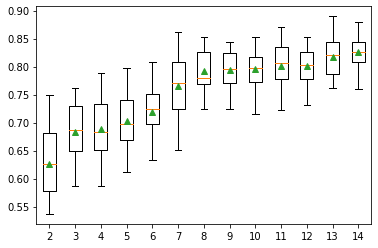

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###SVM

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.844343 using {'C': 1.7, 'kernel': 'rbf'}
0.808435 (0.022773) with: {'C': 0.1, 'kernel': 'linear'}
0.770753 (0.054460) with: {'C': 0.1, 'kernel': 'poly'}
0.815834 (0.023997) with: {'C': 0.1, 'kernel': 'rbf'}
0.795642 (0.036841) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.813056 (0.021174) with: {'C': 0.3, 'kernel': 'linear'}
0.807467 (0.036493) with: {'C': 0.3, 'kernel': 'poly'}
0.823216 (0.015710) with: {'C': 0.3, 'kernel': 'rbf'}
0.780810 (0.031634) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.813048 (0.023527) with: {'C': 0.5, 'kernel': 'linear'}
0.813931 (0.032490) with: {'C': 0.5, 'kernel': 'poly'}
0.833325 (0.013435) with: {'C': 0.5, 'kernel': 'rbf'}
0.776155 (0.034119) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.814891 (0.022521) with: {'C': 0.7, 'kernel': 'linear'}
0.820370 (0.031818) with: {'C': 0.7, 'kernel': 'poly'}
0.838846 (0.019086) with: {'C': 0.7, 'kernel': 'rbf'}
0.763260 (0.039317) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.815809 (0.022754) with: {'C': 0.9, 'kernel': 'linear'

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
SVM = SVC(C=2.0, kernel='rbf')
start = time.time()
SVM.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.032509


In [ ]:
# estimate accuracy on validation dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
SVMPred = SVM.predict(X_test_scaled)

print(confusion_matrix(Y_test, SVMPred))

[[154  19]
 [ 27  72]]


In [ ]:
accuracy = accuracy_score(Y_test, SVMPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, SVMPred))

Accuracy: 83.09%
              precision    recall  f1-score   support

           1       0.85      0.89      0.87       173
           2       0.79      0.73      0.76        99

    accuracy                           0.83       272
   macro avg       0.82      0.81      0.81       272
weighted avg       0.83      0.83      0.83       272



In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    XTest_scaled = scaler.transform(XTest)
SVMPred = SVM.predict(XTest_scaled)

EVALUATION['SVC'] = list(SVMPred)

###LinearSVC

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
LSVC = LinearSVC()
start = time.time()
LSVC.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.045703


In [ ]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
LSVCPred = LSVC.predict(X_test_scaled)
LSVC.fit(X_test_scaled, Y_test)
print(confusion_matrix(Y_test, LSVCPred))

[[150  23]
 [ 26  73]]


In [ ]:
accuracy = accuracy_score(Y_test, LSVCPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, LSVCPred))

Accuracy: 81.99%
              precision    recall  f1-score   support

           1       0.85      0.87      0.86       173
           2       0.76      0.74      0.75        99

    accuracy                           0.82       272
   macro avg       0.81      0.80      0.80       272
weighted avg       0.82      0.82      0.82       272



In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    XTest_scaled = scaler.transform(XTest)
LSVCPred = LSVC.predict(XTest_scaled)

EVALUATION['LinearSVC'] = list(LSVCPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator= LinearSVC(), n_features_to_select=5)
model = LinearSVC()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.544 (0.132)


In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

0.6360294117647058


>2 : Features :: Accuracy : 0.580 (Time : 0.143)
>3 : Features :: Accuracy : 0.587 (Time : 0.148)
>4 : Features :: Accuracy : 0.544 (Time : 0.144)
>5 : Features :: Accuracy : 0.592 (Time : 0.123)
>6 : Features :: Accuracy : 0.578 (Time : 0.118)
>7 : Features :: Accuracy : 0.545 (Time : 0.136)
>8 : Features :: Accuracy : 0.570 (Time : 0.129)
>9 : Features :: Accuracy : 0.565 (Time : 0.128)
>10 : Features :: Accuracy : 0.564 (Time : 0.133)
>11 : Features :: Accuracy : 0.531 (Time : 0.137)
>12 : Features :: Accuracy : 0.573 (Time : 0.119)
>13 : Features :: Accuracy : 0.528 (Time : 0.141)
>14 : Features :: Accuracy : 0.584 (Time : 0.122)


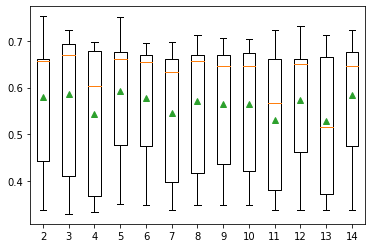

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator= LinearSVC(), n_features_to_select=i)
		model = LinearSVC()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###CALIBERATED CLASSIFIER

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
CCCV = CalibratedClassifierCV(base_estimator = LSVC)
start = time.time()
CCCV.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.195899


In [ ]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
CCCVPred = CCCV.predict(X_test_scaled)
CCCV.fit(X_test_scaled, Y_test)
print(confusion_matrix(Y_test, CCCVPred))

[[151  22]
 [ 27  72]]


In [ ]:
accuracy = accuracy_score(Y_test, CCCVPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, CCCVPred))

Accuracy: 81.99%
              precision    recall  f1-score   support

           1       0.85      0.87      0.86       173
           2       0.77      0.73      0.75        99

    accuracy                           0.82       272
   macro avg       0.81      0.80      0.80       272
weighted avg       0.82      0.82      0.82       272



In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    XTest_scaled = scaler.transform(XTest)
CCCVPred = CCCV.predict(XTest_scaled)

EVALUATION['CaliberatedCV'] = list(CCCVPred)

###NB

In [ ]:
NB = GaussianNB()
NB.fit(X_train,Y_train)
NBPred = NB.predict(X_test)
NB.score(X_test, Y_test)
NB.fit(X_test, Y_test)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
cm = confusion_matrix(Y_test, NBPred)
print(cm)

[[ 69 104]
 [ 11  88]]


In [ ]:
accuracy = accuracy_score(Y_test, NBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, NBPred))

Accuracy: 57.72%
              precision    recall  f1-score   support

           1       0.86      0.40      0.55       173
           2       0.46      0.89      0.60        99

    accuracy                           0.58       272
   macro avg       0.66      0.64      0.58       272
weighted avg       0.72      0.58      0.57       272



In [ ]:
NBPred = NB.predict(XTest)

EVALUATION['NB'] = list(NBPred)

###DECISION TREE

In [ ]:
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,Y_train)
DTPred = DT.predict(X_test)
DT.score(X_test, Y_test)
DT.fit(X_test, Y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
cm = confusion_matrix(Y_test, DTPred)
print(cm)

[[150  23]
 [ 25  74]]


In [ ]:
accuracy = accuracy_score(Y_test, DTPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, DTPred))

Accuracy: 82.35%
              precision    recall  f1-score   support

           1       0.86      0.87      0.86       173
           2       0.76      0.75      0.76        99

    accuracy                           0.82       272
   macro avg       0.81      0.81      0.81       272
weighted avg       0.82      0.82      0.82       272



In [ ]:
DTPred = DT.predict(XTest)

EVALUATION['DT'] = list(DTPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.710 (0.042)


In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

0.7169117647058824


>2 : Features :: Accuracy : 0.631 (Time : 0.052)
>3 : Features :: Accuracy : 0.681 (Time : 0.048)
>4 : Features :: Accuracy : 0.703 (Time : 0.043)
>5 : Features :: Accuracy : 0.706 (Time : 0.047)
>6 : Features :: Accuracy : 0.727 (Time : 0.041)
>7 : Features :: Accuracy : 0.766 (Time : 0.051)
>8 : Features :: Accuracy : 0.787 (Time : 0.035)
>9 : Features :: Accuracy : 0.793 (Time : 0.033)
>10 : Features :: Accuracy : 0.796 (Time : 0.029)
>11 : Features :: Accuracy : 0.805 (Time : 0.034)
>12 : Features :: Accuracy : 0.801 (Time : 0.035)
>13 : Features :: Accuracy : 0.814 (Time : 0.042)
>14 : Features :: Accuracy : 0.822 (Time : 0.034)


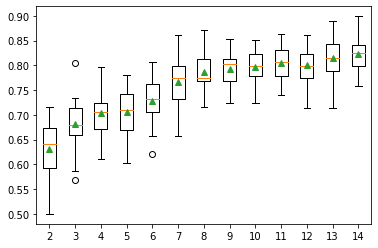

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###DECISON TREE BAGGING

In [ ]:
Bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)
Bagging.fit(X_train, Y_train)
BPred = Bagging.predict(X_test)
Bagging.score(X_test, Y_test)

0.8125

In [ ]:
cm = confusion_matrix(Y_test, BPred)
print(cm)

[[158  15]
 [ 36  63]]


In [ ]:
accuracy = accuracy_score(Y_test, BPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, BPred))

Accuracy: 81.25%
              precision    recall  f1-score   support

           1       0.81      0.91      0.86       173
           2       0.81      0.64      0.71        99

    accuracy                           0.81       272
   macro avg       0.81      0.77      0.79       272
weighted avg       0.81      0.81      0.81       272



In [ ]:
BPred = Bagging.predict(XTest)

EVALUATION['Bagging'] = list(BPred)

###EXTRA TREE CLASSFIER

In [ ]:
ET = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
ET.fit(X_train, Y_train)
ET.score(X_train, Y_train)
ETPred = ET.predict(X_test)
ET.score(X_test, Y_test)

0.8529411764705882

In [ ]:
cm = confusion_matrix(Y_test, ETPred)
print(cm)

[[157  16]
 [ 24  75]]


In [ ]:
accuracy = accuracy_score(Y_test, ETPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, ETPred))

Accuracy: 85.29%
              precision    recall  f1-score   support

           1       0.87      0.91      0.89       173
           2       0.82      0.76      0.79        99

    accuracy                           0.85       272
   macro avg       0.85      0.83      0.84       272
weighted avg       0.85      0.85      0.85       272



In [ ]:
ETPred = ET.predict(XTest)

EVALUATION['ExtraTree'] = list(ETPred)

###RANDOM FOREST

In [ ]:
RF = RandomForestClassifier(criterion='entropy', random_state=0)
RF.fit(X_train,Y_train)
RFPred = RF.predict(X_test)
RF.score(X_test, Y_test)
RF.fit(X_test, Y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
cm = confusion_matrix(Y_test, RFPred)
print(cm)

[[156  17]
 [ 23  76]]


In [ ]:
accuracy = accuracy_score(Y_test, RFPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, RFPred))

Accuracy: 85.29%
              precision    recall  f1-score   support

           1       0.87      0.90      0.89       173
           2       0.82      0.77      0.79        99

    accuracy                           0.85       272
   macro avg       0.84      0.83      0.84       272
weighted avg       0.85      0.85      0.85       272



In [ ]:
RFPred = RF.predict(XTest)

EVALUATION['RF'] = list(RFPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator= RandomForestClassifier(criterion='entropy', random_state=0), n_features_to_select=5)
model = RandomForestClassifier(criterion='entropy', random_state=0)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.746 (0.038)


In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))



0.7058823529411765


>2 : Features :: Accuracy : 0.625 (Time : 0.034)
>3 : Features :: Accuracy : 0.718 (Time : 0.035)
>4 : Features :: Accuracy : 0.755 (Time : 0.038)
>5 : Features :: Accuracy : 0.744 (Time : 0.038)
>6 : Features :: Accuracy : 0.749 (Time : 0.039)
>7 : Features :: Accuracy : 0.754 (Time : 0.039)
>8 : Features :: Accuracy : 0.759 (Time : 0.038)
>9 : Features :: Accuracy : 0.770 (Time : 0.037)
>10 : Features :: Accuracy : 0.793 (Time : 0.037)
>11 : Features :: Accuracy : 0.823 (Time : 0.037)
>12 : Features :: Accuracy : 0.817 (Time : 0.032)
>13 : Features :: Accuracy : 0.838 (Time : 0.032)
>14 : Features :: Accuracy : 0.848 (Time : 0.032)


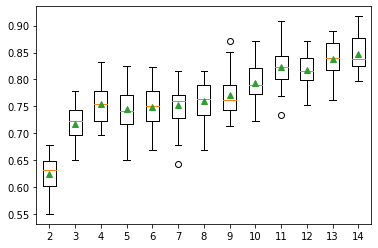

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator=RandomForestClassifier(criterion='entropy'), n_features_to_select=i)
		model = RandomForestClassifier(criterion='entropy')
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###GRADIANT DESCENT CLASSIFIER

In [ ]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
GB.fit(X_train, Y_train)
GBPred = GB.predict(X_test)
#GB.score(X_test, Y_test)
GB.fit(X_test, Y_test)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
cm = confusion_matrix(Y_test, GBPred)
print(cm)

[[152  21]
 [ 20  79]]


In [ ]:
accuracy = accuracy_score(Y_test, GBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, GBPred))

Accuracy: 84.93%
              precision    recall  f1-score   support

           1       0.88      0.88      0.88       173
           2       0.79      0.80      0.79        99

    accuracy                           0.85       272
   macro avg       0.84      0.84      0.84       272
weighted avg       0.85      0.85      0.85       272



In [ ]:
GBPred = GB.predict(XTest)

EVALUATION['GB'] = list(GBPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1), n_features_to_select=5)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.794 (0.036)


In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

0.7830882352941176


>2 : Features :: Accuracy : 0.719 (Time : 0.037)
>3 : Features :: Accuracy : 0.736 (Time : 0.035)
>4 : Features :: Accuracy : 0.794 (Time : 0.031)
>5 : Features :: Accuracy : 0.793 (Time : 0.034)
>6 : Features :: Accuracy : 0.798 (Time : 0.033)
>7 : Features :: Accuracy : 0.809 (Time : 0.029)
>8 : Features :: Accuracy : 0.817 (Time : 0.028)
>9 : Features :: Accuracy : 0.826 (Time : 0.028)
>10 : Features :: Accuracy : 0.834 (Time : 0.031)
>11 : Features :: Accuracy : 0.835 (Time : 0.031)
>12 : Features :: Accuracy : 0.837 (Time : 0.033)
>13 : Features :: Accuracy : 0.837 (Time : 0.030)
>14 : Features :: Accuracy : 0.837 (Time : 0.029)


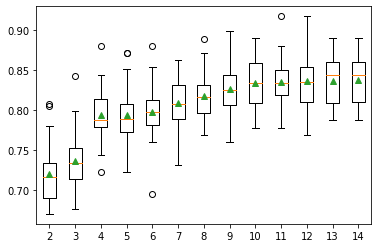

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1), n_features_to_select=i)
		model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###XGBOOST

In [ ]:
XGB = XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)
XGB.fit(X_train, Y_train, verbose=False)
XGBPred = XGB.predict(X_test)
XGB.fit(X_test, Y_test, verbose=False)
print(XGB.score(X_train, Y_train))
print(XGB.score(X_test, Y_test))

0.8084714548802947
0.9375


In [ ]:
cm = confusion_matrix(Y_test, XGBPred)
print(cm)

[[158  15]
 [ 24  75]]


In [ ]:
accuracy = accuracy_score(Y_test, XGBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, XGBPred))

Accuracy: 85.66%
              precision    recall  f1-score   support

           1       0.87      0.91      0.89       173
           2       0.83      0.76      0.79        99

    accuracy                           0.86       272
   macro avg       0.85      0.84      0.84       272
weighted avg       0.86      0.86      0.86       272



In [ ]:
#XGBPred = XGB.predict(XTest)
#XGBPred

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator= XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75), n_features_to_select=5)
model = XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.799 (0.034)


In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

0.7683823529411765


>2 : Features :: Accuracy : 0.657 (Time : 0.003)
>3 : Features :: Accuracy : 0.727 (Time : 0.039)
>4 : Features :: Accuracy : 0.760 (Time : 0.034)
>5 : Features :: Accuracy : 0.799 (Time : 0.034)
>6 : Features :: Accuracy : 0.828 (Time : 0.033)
>7 : Features :: Accuracy : 0.832 (Time : 0.030)
>8 : Features :: Accuracy : 0.839 (Time : 0.033)
>9 : Features :: Accuracy : 0.838 (Time : 0.034)
>10 : Features :: Accuracy : 0.841 (Time : 0.026)
>11 : Features :: Accuracy : 0.837 (Time : 0.028)
>12 : Features :: Accuracy : 0.838 (Time : 0.028)
>13 : Features :: Accuracy : 0.839 (Time : 0.026)
>14 : Features :: Accuracy : 0.839 (Time : 0.028)


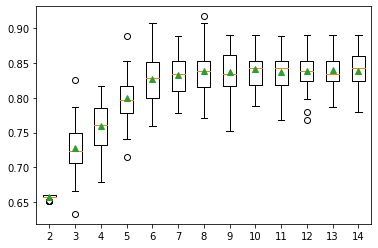

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator= XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75), n_features_to_select=i)
		model = XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###ADABOOST

In [ ]:
ADAB = AdaBoostClassifier()
ADAB.fit(X_train, Y_train)
ADABPred = ADAB.predict(X_test)
ADAB.fit(X_test, Y_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
cm = confusion_matrix(Y_test, ADABPred)
print(cm)

[[157  16]
 [ 24  75]]


In [ ]:
accuracy = accuracy_score(Y_test, ADABPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, ADABPred))

Accuracy: 85.29%
              precision    recall  f1-score   support

           1       0.87      0.91      0.89       173
           2       0.82      0.76      0.79        99

    accuracy                           0.85       272
   macro avg       0.85      0.83      0.84       272
weighted avg       0.85      0.85      0.85       272



In [ ]:
ADABPred = ADAB.predict(XTest)
EVALUATION['ADB'] = list(ADABPred)

###RECURSIVE FEATURE ELIMINATION

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
rfe = RFE(estimator=AdaBoostClassifier(), n_features_to_select=5)
model = AdaBoostClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.702 (0.034)


In [ ]:
# fit the model on all available data
pipeline.fit(X_train, Y_train)
# make a prediction for one example
YP = pipeline.predict(X_test)
print(accuracy_score(Y_test, YP))

0.6580882352941176


>2 : Features :: Accuracy : 0.653 (Time : 0.030)
>3 : Features :: Accuracy : 0.683 (Time : 0.043)
>4 : Features :: Accuracy : 0.705 (Time : 0.034)
>5 : Features :: Accuracy : 0.706 (Time : 0.032)
>6 : Features :: Accuracy : 0.708 (Time : 0.031)
>7 : Features :: Accuracy : 0.711 (Time : 0.032)
>8 : Features :: Accuracy : 0.712 (Time : 0.032)
>9 : Features :: Accuracy : 0.723 (Time : 0.034)
>10 : Features :: Accuracy : 0.755 (Time : 0.043)
>11 : Features :: Accuracy : 0.776 (Time : 0.034)
>12 : Features :: Accuracy : 0.792 (Time : 0.047)
>13 : Features :: Accuracy : 0.815 (Time : 0.037)
>14 : Features :: Accuracy : 0.832 (Time : 0.034)


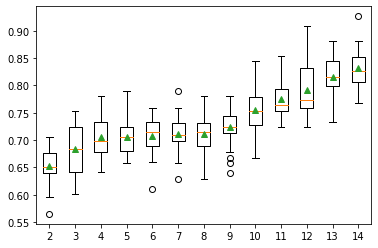

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X_train, Y_train
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator= AdaBoostClassifier(), n_features_to_select=i)
		model = AdaBoostClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X_train, Y_train = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s : Features :: Accuracy : %.3f (Time : %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###CATBOOST

In [ ]:
CDAB = CatBoostClassifier()
CDAB.fit(X_train, Y_train)
CDABPred = ADAB.predict(X_test)
CDAB.fit(X_test, Y_test)

Learning rate set to 0.007604
0:	learn: 0.6900262	total: 2.54ms	remaining: 2.53s
1:	learn: 0.6868474	total: 3.96ms	remaining: 1.98s
2:	learn: 0.6837811	total: 5.42ms	remaining: 1.8s
3:	learn: 0.6808996	total: 6.71ms	remaining: 1.67s
4:	learn: 0.6775490	total: 7.93ms	remaining: 1.58s
5:	learn: 0.6745177	total: 9.3ms	remaining: 1.54s
6:	learn: 0.6717776	total: 10.7ms	remaining: 1.51s
7:	learn: 0.6691892	total: 12ms	remaining: 1.49s
8:	learn: 0.6659417	total: 13.4ms	remaining: 1.48s
9:	learn: 0.6630031	total: 14.8ms	remaining: 1.47s
10:	learn: 0.6597517	total: 16.3ms	remaining: 1.46s
11:	learn: 0.6564772	total: 17.7ms	remaining: 1.46s
12:	learn: 0.6535877	total: 19.1ms	remaining: 1.45s
13:	learn: 0.6504673	total: 20.5ms	remaining: 1.44s
14:	learn: 0.6474915	total: 21.9ms	remaining: 1.44s
15:	learn: 0.6447413	total: 23.3ms	remaining: 1.43s
16:	learn: 0.6419467	total: 24.6ms	remaining: 1.42s
17:	learn: 0.6389404	total: 26ms	remaining: 1.42s
18:	learn: 0.6364524	total: 27.3ms	remaining: 1.41

In [ ]:
cm = confusion_matrix(Y_test, CDABPred)
print(cm)

[[28 10]
 [ 3 82]]


In [ ]:
accuracy = accuracy_score(Y_test, CDABPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, CDABPred))

Accuracy: 89.43%
              precision    recall  f1-score   support

           0       0.90      0.74      0.81        38
           1       0.89      0.96      0.93        85

    accuracy                           0.89       123
   macro avg       0.90      0.85      0.87       123
weighted avg       0.89      0.89      0.89       123



In [ ]:
CDABPred = CDAB.predict(XTest)

EVALUATION['CATB'] = list(CDABPred)

In [ ]:
EVALUATION = {}

###ANN

In [ ]:
model = Sequential()

model.add(Dense(units = 32, activation = 'relu', input_shape=(15,)))
model.add(Dense(units = 256, activation = 'relu'))
#model.add(Dense(units = 1024, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 10, nb_epoch = 1000)

Epoch 1/1000
1086/1086 [==============================] - 0s 409us/step - loss: -1642363.4150 - accuracy: 0.6575
Epoch 2/1000
1086/1086 [==============================] - 0s 122us/step - loss: -21418889.3587 - accuracy: 0.6575
Epoch 3/1000
1086/1086 [==============================] - 0s 129us/step - loss: -106023508.8338 - accuracy: 0.6575
Epoch 4/1000
1086/1086 [==============================] - 0s 141us/step - loss: -311055278.4576 - accuracy: 0.6575
Epoch 5/1000
1086/1086 [==============================] - 0s 127us/step - loss: -657311095.5322 - accuracy: 0.6575
Epoch 6/1000
1086/1086 [==============================] - 0s 131us/step - loss: -1204206235.4696 - accuracy: 0.6575
Epoch 7/1000
1086/1086 [==============================] - 0s 128us/step - loss: -1985752759.4770 - accuracy: 0.6575
Epoch 8/1000
1086/1086 [==============================] - 0s 129us/step - loss: -3029431948.6998 - accuracy: 0.6575
Epoch 9/1000
1086/1086 [==============================] - 0s 132us/step - loss: 

In [ ]:
ANNPred = model.predict(X_test)
cm = confusion_matrix(Y_test, ANNPred)
print(cm)

[[173   0]
 [ 99   0]]


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, ANNPred))
print(classification_report(Y_test, ANNPred))

Accuracy score 0.636029
              precision    recall  f1-score   support

           1       0.64      1.00      0.78       173
           2       0.00      0.00      0.00        99

    accuracy                           0.64       272
   macro avg       0.32      0.50      0.39       272
weighted avg       0.40      0.64      0.49       272



In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_test, Y_test, batch_size = 10, nb_epoch = 1000)

Epoch 1/1000
272/272 [==============================] - 0s 445us/step - loss: -1476907715658691.7500 - accuracy: 0.6360
Epoch 2/1000
272/272 [==============================] - 0s 137us/step - loss: -1477966037053681.0000 - accuracy: 0.6360
Epoch 3/1000
272/272 [==============================] - 0s 129us/step - loss: -1478899448506729.2500 - accuracy: 0.6360
Epoch 4/1000
272/272 [==============================] - 0s 125us/step - loss: -1479889646579953.0000 - accuracy: 0.6360
Epoch 5/1000
272/272 [==============================] - 0s 128us/step - loss: -1480863534500683.2500 - accuracy: 0.6360
Epoch 6/1000
272/272 [==============================] - 0s 130us/step - loss: -1481882356216049.0000 - accuracy: 0.6360
Epoch 7/1000
272/272 [==============================] - 0s 145us/step - loss: -1482833773847009.7500 - accuracy: 0.6360
Epoch 8/1000
272/272 [==============================] - 0s 139us/step - loss: -1483855381490025.2500 - accuracy: 0.6360
Epoch 9/1000
272/272 [==================

In [ ]:
ANNPred = model.predict(XTest)
EVALUATION['ANN'] = list(ANNPred)

###Deep Learning

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(64, activation = 'relu', input_shape=(15,)))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))
/
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                1024      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 149,505
Trainable params: 149,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

checkpointer = ModelCheckpoint(filepath='weights.best.cnn.hdf5', verbose=1, save_best_only=True) 

In [ ]:
NN_model.fit(X_train, Y_train, epochs=1000, batch_size=30, validation_split = 0.2, callbacks=callbacks_list)

Train on 868 samples, validate on 218 samples
Epoch 1/1000
868/868 [==============================] - 0s 245us/step - loss: 0.3560 - mean_absolute_error: 0.3560 - val_loss: 0.2890 - val_mean_absolute_error: 0.2890

Epoch 00001: val_loss improved from inf to 0.28899, saving model to Weights-001--0.28899.hdf5
Epoch 2/1000
868/868 [==============================] - 0s 114us/step - loss: 0.3560 - mean_absolute_error: 0.3560 - val_loss: 0.2890 - val_mean_absolute_error: 0.2890

Epoch 00002: val_loss did not improve from 0.28899
Epoch 3/1000
868/868 [==============================] - 0s 107us/step - loss: 0.3560 - mean_absolute_error: 0.3560 - val_loss: 0.2890 - val_mean_absolute_error: 0.2890

Epoch 00003: val_loss did not improve from 0.28899
Epoch 4/1000
868/868 [==============================] - 0s 115us/step - loss: 0.3560 - mean_absolute_error: 0.3560 - val_loss: 0.2890 - val_mean_absolute_error: 0.2890

Epoch 00004: val_loss did not improve from 0.28899
Epoch 5/1000
868/868 [=========

In [ ]:
#NN_model.load_weights('weights.best.cnn.hdf5')

In [ ]:
#wights_file = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
#NN_model.load_weights(wights_file) 
#NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
DL_pred = model.predict(X_test)

#Array of list of list to Array of list
DLPred = []
for i in DL_pred:
  for k in i:
    DLPred.append(int(k))
  
DLPred = np.array(DLPred) 

#PRINT
#Y_test, Y_new

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, DLPred)
print(cm)

[[173   0]
 [ 99   0]]


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, DLPred))
print(classification_report(Y_test, DLPred))

Accuracy score 0.636029
              precision    recall  f1-score   support

           1       0.64      1.00      0.78       173
           2       0.00      0.00      0.00        99

    accuracy                           0.64       272
   macro avg       0.32      0.50      0.39       272
weighted avg       0.40      0.64      0.49       272



In [ ]:
NN_model.fit(X_test, Y_test, epochs=1000, batch_size=30, validation_split = 0.2, callbacks=callbacks_list)

Train on 217 samples, validate on 55 samples
Epoch 1/1000
217/217 [==============================] - 0s 147us/step - loss: 0.3871 - mean_absolute_error: 0.3871 - val_loss: 0.2727 - val_mean_absolute_error: 0.2727

Epoch 00001: val_loss improved from 0.28899 to 0.27273, saving model to Weights-001--0.27273.hdf5
Epoch 2/1000
217/217 [==============================] - 0s 127us/step - loss: 0.3871 - mean_absolute_error: 0.3871 - val_loss: 0.2727 - val_mean_absolute_error: 0.2727

Epoch 00002: val_loss did not improve from 0.27273
Epoch 3/1000
217/217 [==============================] - 0s 137us/step - loss: 0.3871 - mean_absolute_error: 0.3871 - val_loss: 0.2727 - val_mean_absolute_error: 0.2727

Epoch 00003: val_loss did not improve from 0.27273
Epoch 4/1000
217/217 [==============================] - 0s 132us/step - loss: 0.3871 - mean_absolute_error: 0.3871 - val_loss: 0.2727 - val_mean_absolute_error: 0.2727

Epoch 00004: val_loss did not improve from 0.27273
Epoch 5/1000
217/217 [======

In [ ]:
DLPred = model.predict(XTest)
DL_Pred = []
for i in DLPred:
  for k in i:
    DL_Pred.append(int(k))
  
DLPred = np.array(DL_Pred) 

In [ ]:
EVALUATION['DL'] = list(DLPred)

#EVALUATION 

In [ ]:
pd.DataFrame(EVALUATION)

,SVC,LinearSVC,CaliberatedCV,NB,DT,Bagging,ExtraTree,RF,GB,ADB,ANN,DL
0,1,1,1,1,1,1,1,1,1,1,[1.0],1
1,2,2,2,1,2,2,2,2,2,2,[1.0],1
2,1,1,1,2,1,1,1,1,1,1,[1.0],1
3,1,1,1,1,1,1,1,1,1,1,[1.0],1
4,1,1,1,1,2,1,1,1,1,2,[1.0],1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,2,2,2,1,1,1,2,1,1,[1.0],1
579,1,1,1,1,1,1,1,1,1,1,[1.0],1
580,1,1,1,1,1,1,1,1,1,1,[1.0],1
581,1,1,1,1,1,1,1,1,2,1,[1.0],1
